In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('After Data Quality Assessment Applied Measures.csv')

# Convert column names to lowercase
df.columns = df.columns.str.lower()

# Convert all data in the DataFrame to lowercase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Check for missing values
missing_values = df.isnull().sum()

# Remove duplicate rows
df = df.drop_duplicates()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Print information about the dataset
print("Dataset Information:")
print(df.info())

# Print summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Print missing values count
print("\nMissing Values:")
print(missing_values)

# Print duplicate rows count
print("\nDuplicate Rows:", duplicate_rows)

df.reset_index(drop=True, inplace=True)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32409 entries, 0 to 32573
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32409 non-null  int64  
 1   person_income               32409 non-null  int64  
 2   person_home_ownership       32409 non-null  object 
 3   person_emp_length           32409 non-null  int64  
 4   loan_intent                 32409 non-null  object 
 5   loan_grade                  32409 non-null  object 
 6   loan_amnt                   32409 non-null  int64  
 7   loan_int_rate               32409 non-null  float64
 8   loan_status                 32409 non-null  int64  
 9   loan_percent_income         32409 non-null  float64
 10  cb_person_default_on_file   32409 non-null  object 
 11  cb_person_cred_hist_length  32409 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 3.2+ MB
None

Summ

In [ ]:
# Calculate average age of loan applicants
average_age = df['person_age'].mean()
print(f"Average age of loan applicants: {average_age:.2f}")

# Calculate median income of applicants
median_income = df['person_income'].median()
print(f"Median income of applicants: {median_income:.2f}")

# Calculate typical loan amount requested by applicants
typical_loan_amount = df['loan_amnt'].median()
print(f"Typical loan amount requested: {typical_loan_amount:.2f}")

# Calculate standard deviation of interest rates for the loans
std_interest_rate = df['loan_int_rate'].std()
print(f"Standard deviation of interest rates: {std_interest_rate:.2f}")

# Count the number of approved loan applications
approved_applications = df[df['loan_status'] == 1].shape[0]
print(f"Number of approved loan applications: {approved_applications}")


Average age of loan applicants: 27.73
Median income of applicants: 55000.00
Typical loan amount requested: 8000.00
Standard deviation of interest rates: 3.08
Number of approved loan applications: 7088


Distribution of Ages of Applicants:
count    32409.000000
mean        27.730754
std          6.210445
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max         94.000000
Name: person_age, dtype: float64


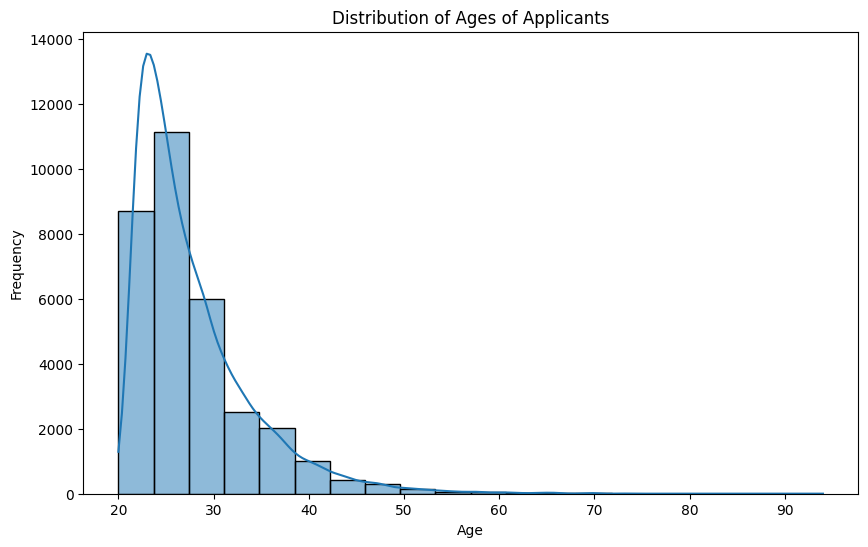

Distribution of Loan Amounts Requested:
count    32409.000000
mean      9592.486655
std       6320.885127
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12250.000000
max      35000.000000
Name: loan_amnt, dtype: float64


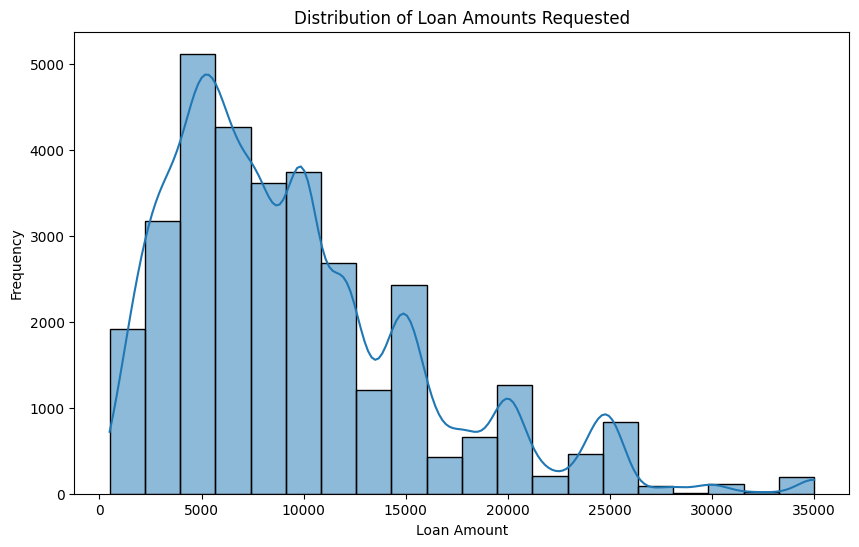

Distribution of Interest Rates by Loan Intents:
                    count       mean       std   min   25%    50%    75%  \
loan_intent                                                                
debtconsolidation  5189.0  10.989632  3.099404  5.42  8.32  10.99  13.11   
education          6409.0  10.957928  3.041156  5.42  8.00  10.99  13.06   
homeimprovement    3594.0  11.189900  3.203413  5.42  8.59  10.99  13.49   
medical            6042.0  11.057009  3.059686  5.42  8.59  10.99  13.16   
personal           5496.0  11.001507  3.078823  5.42  8.49  10.99  13.11   
venture            5679.0  10.957480  3.063126  5.42  8.07  10.99  13.06   

                     max  
loan_intent               
debtconsolidation  22.11  
education          21.74  
homeimprovement    23.22  
medical            21.74  
personal           21.74  
venture            22.48  


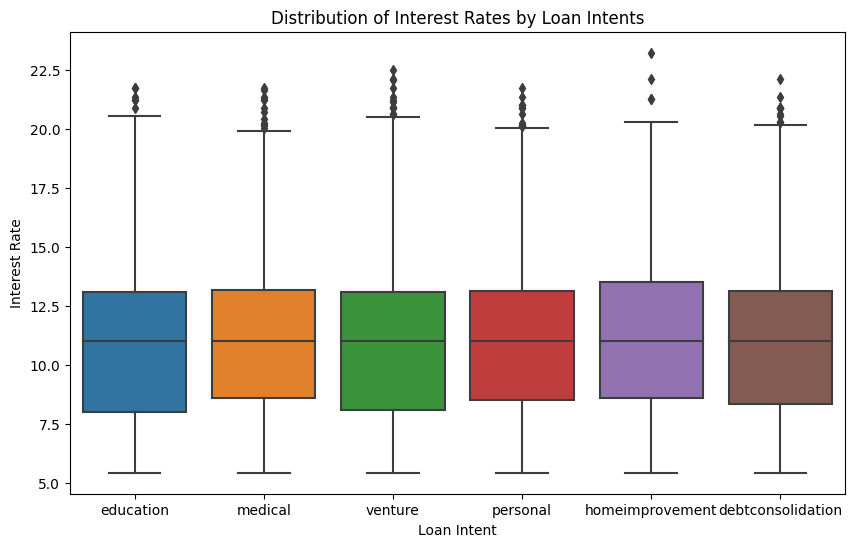

Distribution of Loan Approval Status:
0    25321
1     7088
Name: loan_status, dtype: int64


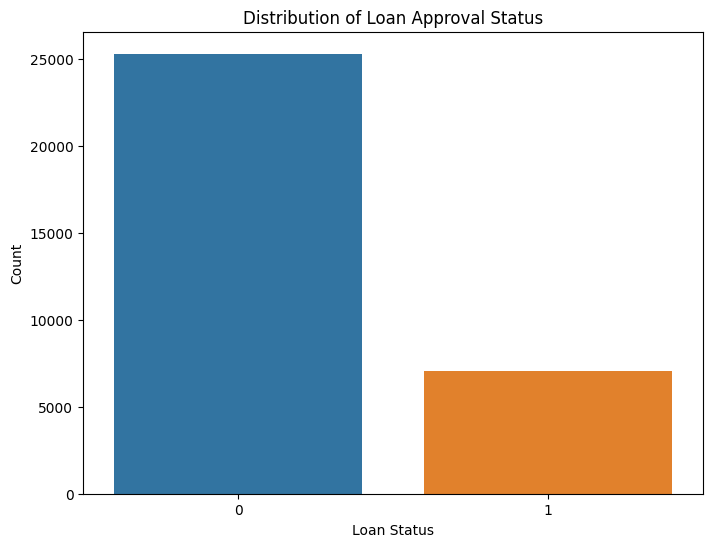

Loan Approval Based on Loan Grade:
loan_status     0     1
loan_grade             
a            9636  1066
b            8689  1695
c            5100  1336
d            1482  2137
e             342   621
f              71   170
g               1    63


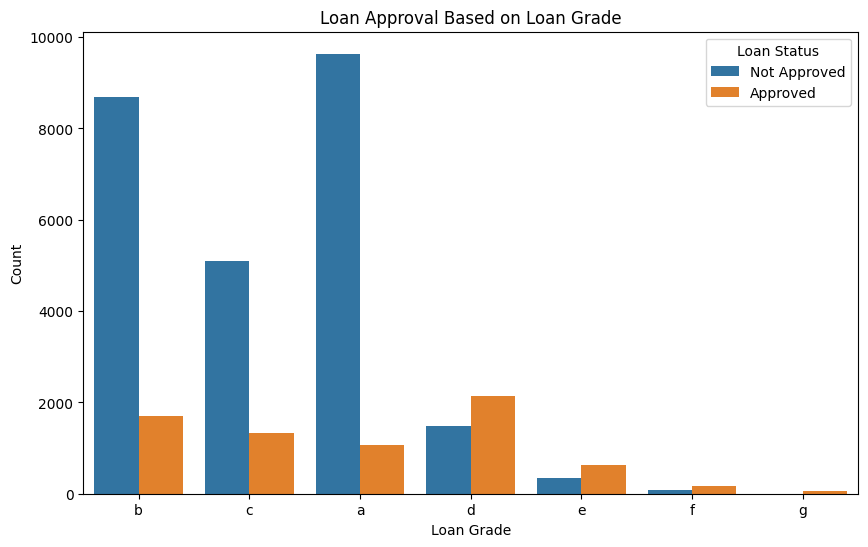

In [ ]:
# Create a histogram for distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='person_age', bins=20, kde=True)
plt.title('Distribution of Ages of Applicants')
plt.xlabel('Age')
plt.ylabel('Frequency')
print("Distribution of Ages of Applicants:")
print(df['person_age'].describe())
plt.show()

# Create a histogram for distribution of loan amounts
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='loan_amnt', bins=20, kde=True)
plt.title('Distribution of Loan Amounts Requested')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
print("Distribution of Loan Amounts Requested:")
print(df['loan_amnt'].describe())
plt.show()

# Create a box plot for distribution of interest rates by loan intents
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='loan_intent', y='loan_int_rate')
plt.title('Distribution of Interest Rates by Loan Intents')
plt.xlabel('Loan Intent')
plt.ylabel('Interest Rate')
print("Distribution of Interest Rates by Loan Intents:")
print(df.groupby('loan_intent')['loan_int_rate'].describe())
plt.show()

# Create a bar plot for distribution of loan approval status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loan_status')
plt.title('Distribution of Loan Approval Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
print("Distribution of Loan Approval Status:")
print(df['loan_status'].value_counts())
plt.show()

# Create a bar plot for loan approval based on loan grade
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loan_grade', hue='loan_status')
plt.title('Loan Approval Based on Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Not Approved', 'Approved'])
print("Loan Approval Based on Loan Grade:")
print(df.groupby(['loan_grade', 'loan_status']).size().unstack())
plt.show()


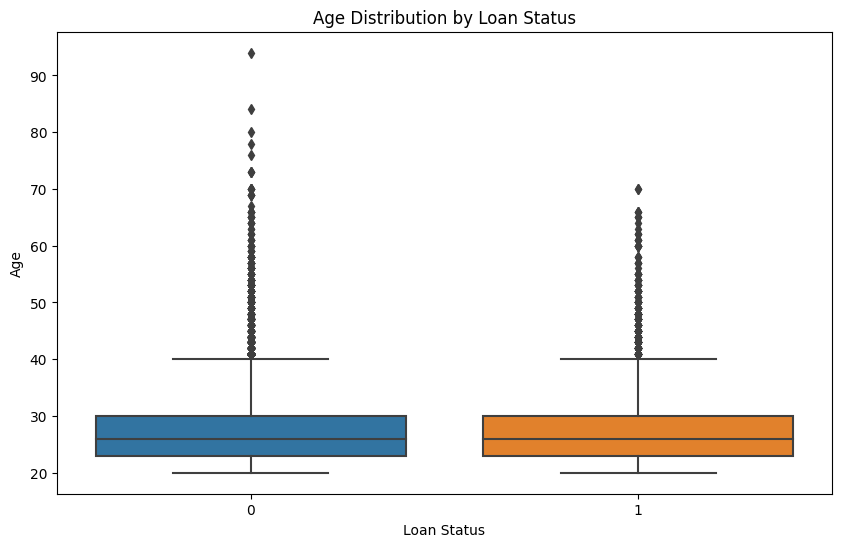

Data for 'loan_status' and 'person_age':
       loan_status  person_age
0                0          21
1                1          25
2                1          23
3                1          24
4                1          21
...            ...         ...
32404            0          57
32405            0          54
32406            1          65
32407            0          56
32408            0          66

[32409 rows x 2 columns]


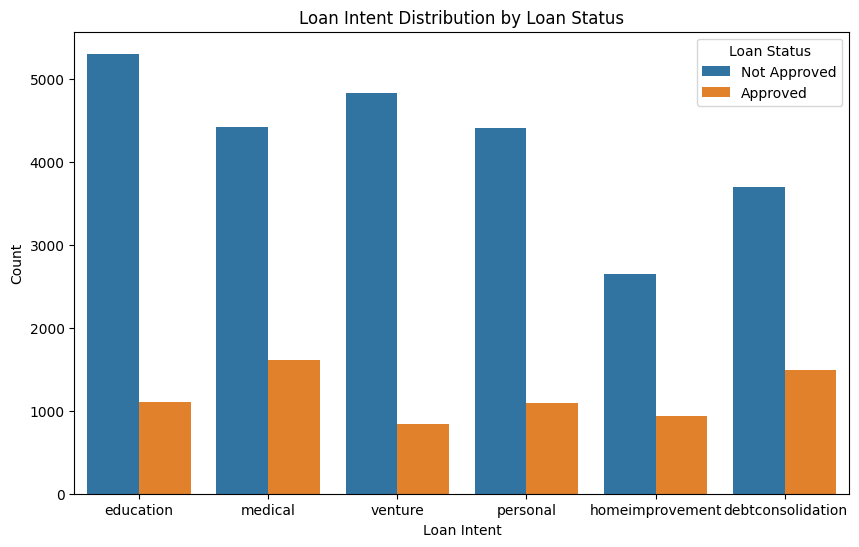

Data for 'loan_intent' and 'loan_status':
           loan_intent  loan_status
0            education            0
1              medical            1
2              medical            1
3              medical            1
4              venture            1
...                ...          ...
32404         personal            0
32405         personal            0
32406  homeimprovement            1
32407         personal            0
32408          medical            0

[32409 rows x 2 columns]


In [ ]:
# Box plot for age and loan status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='loan_status', y='person_age')
plt.title('Age Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Age')
plt.show()
print("Data for 'loan_status' and 'person_age':")
print(df[['loan_status', 'person_age']])

# Bar plot for loan intent and loan status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loan_intent', hue='loan_status')
plt.title('Loan Intent Distribution by Loan Status')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Not Approved', 'Approved'])
plt.show()
print("Data for 'loan_intent' and 'loan_status':")
print(df[['loan_intent', 'loan_status']])


In [ ]:
from scipy.stats import kruskal, mannwhitneyu

# Kruskal-Wallis test for loan intent and interest rate
stat, p_value = kruskal(*[group['loan_int_rate'] for name, group in df.groupby('loan_intent')])
print("Kruskal-Wallis Test p-value:", p_value)

# Mann-Whitney U test for loan approval and age
approved_age = df[df['loan_status'] == 1]['person_age']
not_approved_age = df[df['loan_status'] == 0]['person_age']
stat, p_value = mannwhitneyu(approved_age, not_approved_age)
print("Mann-Whitney U Test p-value:", p_value)


Kruskal-Wallis Test p-value: 0.009949646252444055
Mann-Whitney U Test p-value: 5.209703745095022e-10


In [ ]:
# Summary statistics using median and IQR
median_income = df['person_income'].median()
iqr_loan_amount = df['loan_amnt'].quantile(0.75) - df['loan_amnt'].quantile(0.25)
print(f"Median Income: {median_income:.2f}")
print(f"IQR of Loan Amount: {iqr_loan_amount:.2f}")


Median Income: 55000.00
IQR of Loan Amount: 7250.00


In [ ]:
from scipy.stats import ttest_ind

defaulted_income = df[df['cb_person_default_on_file'] == 'y']['person_income']
not_defaulted_income = df[df['cb_person_default_on_file'] == 'n']['person_income']

# Perform independent two-sample t-test
stat, p_value = ttest_ind(defaulted_income, not_defaulted_income)
print("T-Test p-value for Income between Defaulted and Not Defaulted:", p_value)


T-Test p-value for Income between Defaulted and Not Defaulted: 0.6501136224274147


In [ ]:
from scipy.stats import f_oneway

loan_intent_groups = [group['loan_amnt'] for name, group in df.groupby('loan_intent')]

# Perform one-way ANOVA test
stat, p_value = f_oneway(*loan_intent_groups)
print("ANOVA p-value for Loan Amount by Loan Intent:", p_value)


ANOVA p-value for Loan Amount by Loan Intent: 6.103970374662319e-14


In [ ]:
from scipy.stats import pointbiserialr

correlation, p_value = pointbiserialr(df['cb_person_cred_hist_length'], df['loan_status'])
print("Point Biserial Correlation:", correlation)
print("P-value:", p_value)


Point Biserial Correlation: -0.01644058827271118
P-value: 0.0030783608165865306


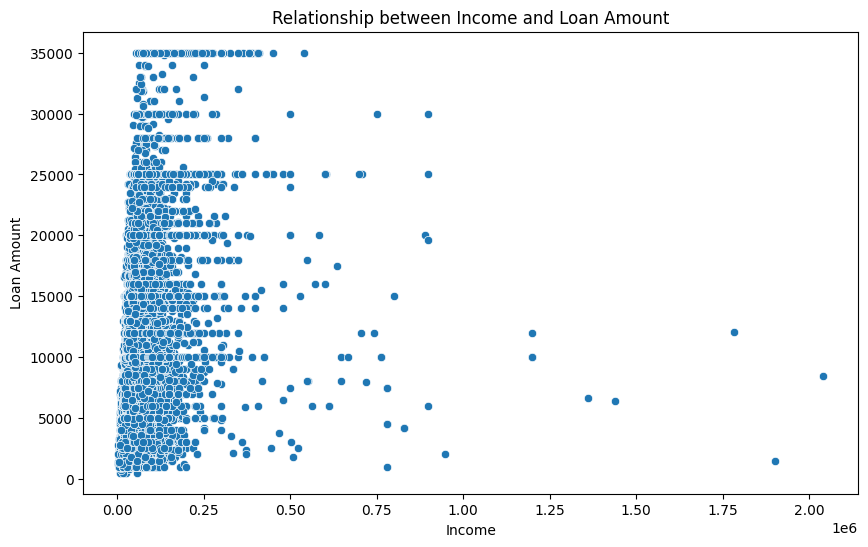

Data for 'person_income' and 'loan_amnt':
       person_income  loan_amnt
0               9600       1000
1               9600       5500
2              65500      35000
3              54400      35000
4               9900       2500
...              ...        ...
32404          53000       5800
32405         120000      17625
32406          76000      35000
32407         150000      15000
32408          42000       6475

[32409 rows x 2 columns]


In [ ]:
# Scatter plot for income and loan amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='person_income', y='loan_amnt')
plt.title("Relationship between Income and Loan Amount")
plt.xlabel("Income")
plt.ylabel("Loan Amount")
plt.show()
print("Data for 'person_income' and 'loan_amnt':")
print(df[['person_income', 'loan_amnt']])


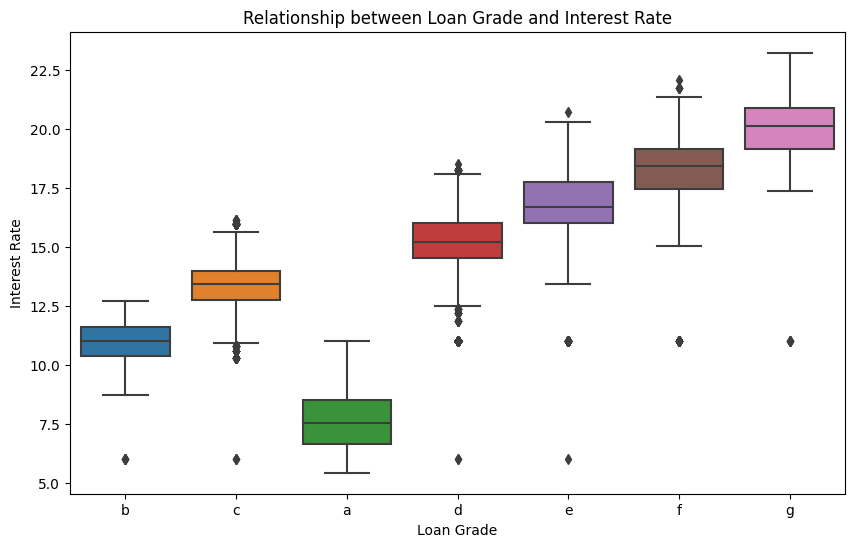

Data for 'loan_grade' and 'loan_int_rate':
      loan_grade  loan_int_rate
0              b          11.14
1              c          12.87
2              c          15.23
3              c          14.27
4              a           7.14
...          ...            ...
32404          c          13.16
32405          a           7.49
32406          b          10.99
32407          b          11.48
32408          b           9.99

[32409 rows x 2 columns]


In [ ]:
# Box plot for loan grade and interest rate
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='loan_grade', y='loan_int_rate')
plt.title("Relationship between Loan Grade and Interest Rate")
plt.xlabel("Loan Grade")
plt.ylabel("Interest Rate")
plt.show()
print("Data for 'loan_grade' and 'loan_int_rate':")
print(df[['loan_grade', 'loan_int_rate']])


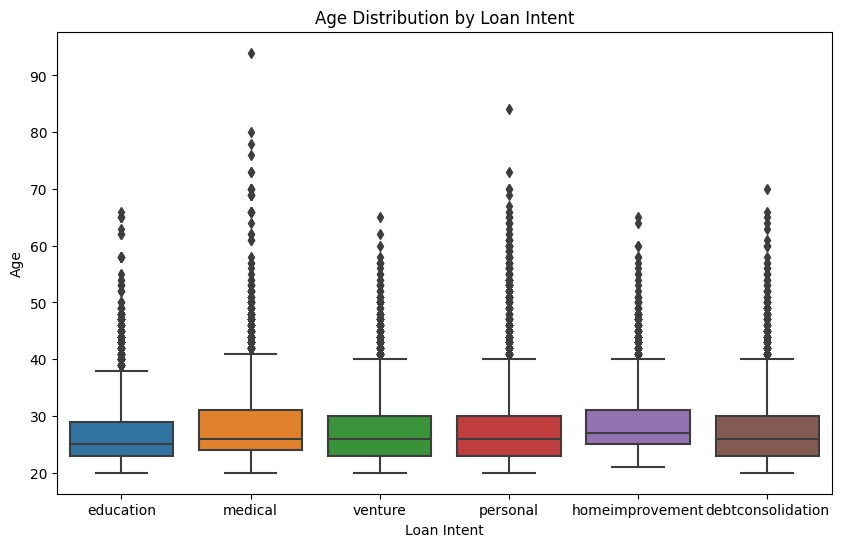

Data for 'loan_intent' and 'person_age':
           loan_intent  person_age
0            education          21
1              medical          25
2              medical          23
3              medical          24
4              venture          21
...                ...         ...
32404         personal          57
32405         personal          54
32406  homeimprovement          65
32407         personal          56
32408          medical          66

[32409 rows x 2 columns]


In [ ]:
# Box plot for age distribution by loan intent
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='loan_intent', y='person_age')
plt.title("Age Distribution by Loan Intent")
plt.xlabel("Loan Intent")
plt.ylabel("Age")
plt.show()
print("Data for 'loan_intent' and 'person_age':")
print(df[['loan_intent', 'person_age']])


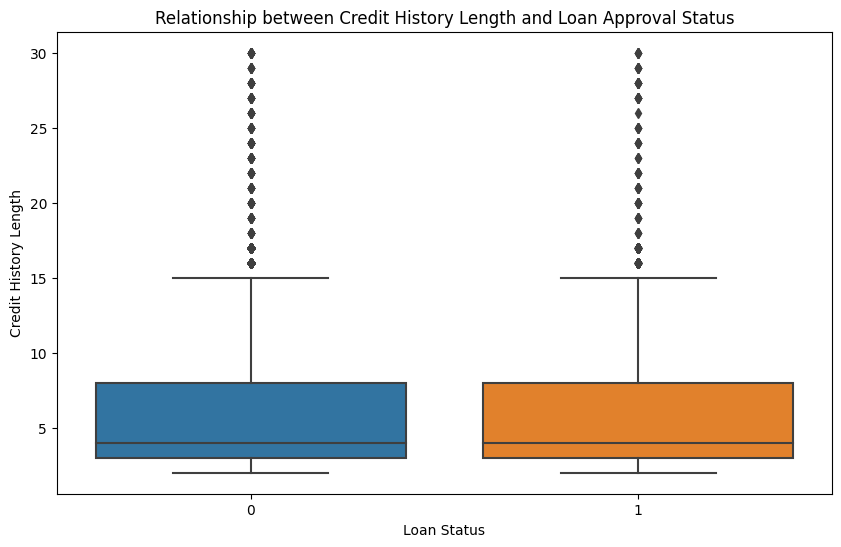

Data for 'loan_status' and 'cb_person_cred_hist_length':
       loan_status  cb_person_cred_hist_length
0                0                           2
1                1                           3
2                1                           2
3                1                           4
4                1                           2
...            ...                         ...
32404            0                          30
32405            0                          19
32406            1                          28
32407            0                          26
32408            0                          30

[32409 rows x 2 columns]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for credit history length and loan status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='loan_status', y='cb_person_cred_hist_length')
plt.title("Relationship between Credit History Length and Loan Approval Status")
plt.xlabel("Loan Status")
plt.ylabel("Credit History Length")
plt.show()
print("Data for 'loan_status' and 'cb_person_cred_hist_length':")
print(df[['loan_status', 'cb_person_cred_hist_length']])


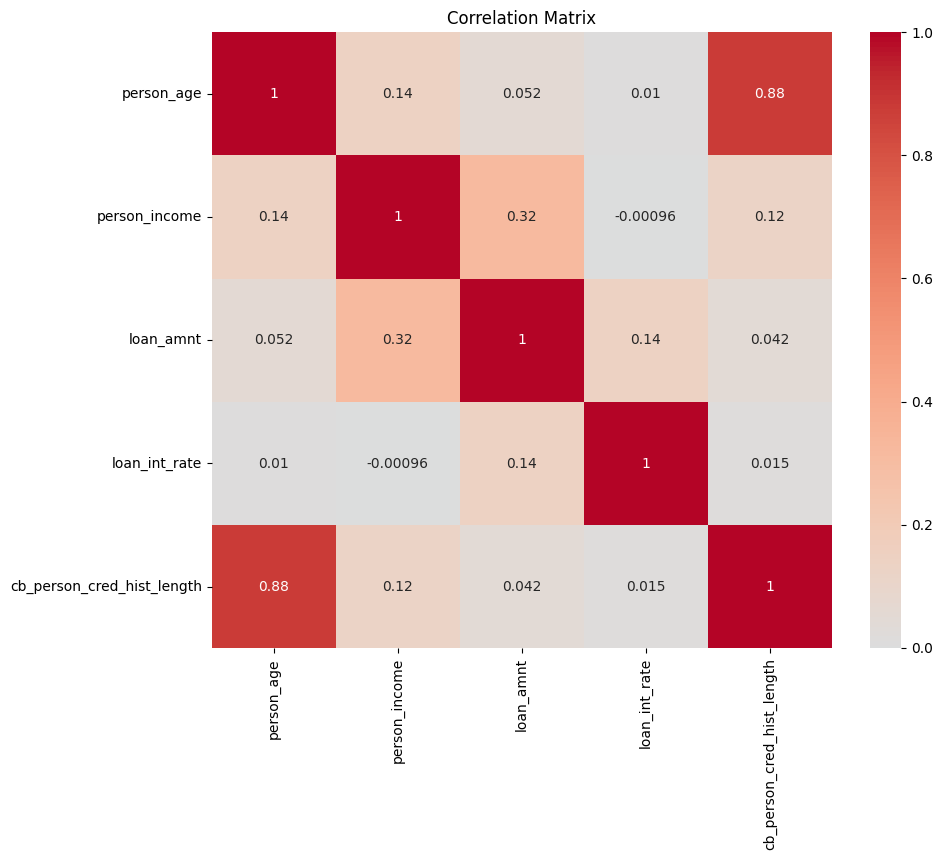

Correlation Matrix Data:
                            person_age  person_income  loan_amnt  \
person_age                    1.000000       0.140487   0.051646   
person_income                 0.140487       1.000000   0.316732   
loan_amnt                     0.051646       0.316732   1.000000   
loan_int_rate                 0.010493      -0.000959   0.139587   
cb_person_cred_hist_length    0.878240       0.122654   0.042139   

                            loan_int_rate  cb_person_cred_hist_length  
person_age                       0.010493                    0.878240  
person_income                   -0.000959                    0.122654  
loan_amnt                        0.139587                    0.042139  
loan_int_rate                    1.000000                    0.014961  
cb_person_cred_hist_length       0.014961                    1.000000  


In [ ]:
# Calculate the correlation matrix
corr_matrix = df[['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']].corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()
print("Correlation Matrix Data:")
print(corr_matrix)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Prepare the data
X = df[['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']]
y = df['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.82
ROC AUC Score: 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      6339
           1       0.70      0.31      0.43      1764

    accuracy                           0.82      8103
   macro avg       0.77      0.64      0.66      8103
weighted avg       0.81      0.82      0.79      8103



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# Prepare the data
X = df[['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']]
y = df['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Build and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.70
ROC AUC Score: 0.71
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.68      0.78      6339
           1       0.39      0.75      0.52      1764

    accuracy                           0.70      8103
   macro avg       0.65      0.71      0.65      8103
weighted avg       0.80      0.70      0.72      8103



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# Prepare the data
X = df[['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']]
y = df['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Build and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train_resampled)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.72
ROC AUC Score: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.80      6339
           1       0.42      0.73      0.53      1764

    accuracy                           0.72      8103
   macro avg       0.66      0.72      0.67      8103
weighted avg       0.80      0.72      0.74      8103



In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

# Prepare the data
X = df[['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']]
y = df['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train_resampled)
best_model = grid_search.best_estimator_

# Cross-validation
cv_scores = cross_val_score(best_model, X_train_scaled, y_train_resampled, cv=5, scoring='roc_auc')

# Make predictions
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Best Model: {best_model}")
print(f"Cross-Validation ROC AUC: {cv_scores.mean():.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print("Classification Report:\n", classification_rep)


Best Model: LogisticRegression(C=1, random_state=42)
Cross-Validation ROC AUC: 0.81
Accuracy: 0.72
ROC AUC Score: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.80      6339
           1       0.42      0.73      0.53      1764

    accuracy                           0.72      8103
   macro avg       0.66      0.72      0.67      8103
weighted avg       0.80      0.72      0.74      8103



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Step 1: Feature Engineering
# You can explore creating new features, encoding categorical variables, etc.
# Example: Convert 'person_home_ownership' and 'loan_intent' into one-hot encoded features
data_encoded = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent'], drop_first=True)

# Step 2: Data Preprocessing
X = data_encoded.drop('loan_status', axis=1)
y = data_encoded['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Use ColumnTransformer to apply different preprocessing to different columns
numeric_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Step 3: Model Selection and Hyperparameter Tuning
model = RandomForestClassifier(random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Step 4: Model Evaluation
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


Confusion Matrix:
[[6046  293]
 [ 711 1053]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6339
           1       0.78      0.60      0.68      1764

    accuracy                           0.88      8103
   macro avg       0.84      0.78      0.80      8103
weighted avg       0.87      0.88      0.87      8103

ROC AUC Score: 0.7753584869821095


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

# Prepare the data
X = df[['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']]
y = df['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)
best_model = grid_search.best_estimator_

# Cross-validation
cv_scores = cross_val_score(best_model, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc')

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Best Model: {best_model}")
print(f"Cross-Validation ROC AUC: {cv_scores.mean():.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print("Classification Report:\n", classification_rep)


Best Model: RandomForestClassifier(n_estimators=300, random_state=42)
Cross-Validation ROC AUC: 0.95
Accuracy: 0.85
ROC AUC Score: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      6339
           1       0.64      0.72      0.68      1764

    accuracy                           0.85      8103
   macro avg       0.78      0.80      0.79      8103
weighted avg       0.86      0.85      0.85      8103



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Prepare the data
X = df[['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']]
y = df['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize base models
random_forest_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)

# Combine models in a VotingClassifier
voting_model = VotingClassifier(estimators=[
    ('rf', random_forest_model),
    ('xgb', xgb_model),
    ('svm', svm_model)
], voting='soft')  # Use 'soft' voting for probability-based combination

# Train the hybrid model
voting_model.fit(X_train, y_train)

# Make predictions using the hybrid model
y_pred = voting_model.predict(X_test)

# Evaluate the hybrid model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the hybrid model: {accuracy:.2f}")


Accuracy of the hybrid model: 0.86


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.86
ROC AUC Score: 0.73
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      6339
           1       0.80      0.49      0.61      1764

    accuracy                           0.86      8103
   macro avg       0.84      0.73      0.76      8103
weighted avg       0.86      0.86      0.85      8103



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Prepare the data
X = df[['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']]
y = df['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Initialize base models
random_forest_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)

# Combine models in a VotingClassifier
voting_model = VotingClassifier(estimators=[
    ('rf', random_forest_model),
    ('xgb', xgb_model),
    ('svm', svm_model)
], voting='soft')  # Use 'soft' voting for probability-based combination

# Train the hybrid model
voting_model.fit(X_train_resampled, y_train_resampled)

# Make predictions using the hybrid model
y_pred = voting_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print(f"Accuracy of the hybrid model: {accuracy:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy of the hybrid model: 0.86
ROC AUC Score: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      6339
           1       0.66      0.72      0.69      1764

    accuracy                           0.86      8103
   macro avg       0.79      0.81      0.80      8103
weighted avg       0.86      0.86      0.86      8103

